

<center><table>
<tr>

<th> <img src= "INL1.png",align="middle",style="width: 10000px;"/> </th>
</tr>
<tr>
<th> <img src="PennNucDataCenter.jpeg"  ,align="middle", style="width: 500px;"/> </th>
</tr>
<center><table>

# <center>Nuclear-Powered Data Centers Economic Optimization Strategy</center>

#### Expected Outcome
- A journal paper evaluating <u>the economic threshold points</u> identifying the conditions under which user requirements would be better suited by a large, small, or micro-reactor. The use case will be focused on data centers and will provide INL with the credential to stake a claim as a leader in nuclear for data center research.

- With a framework on hand, the lab could then leverage its expertise to offer advisory support for the various data centers considering nuclear energy. Further, with interest growing in this area, it is possible that DOE-NE would sponsor research on coupling nuclear reactors with data centers. INL would be well positioned to lead such R&D activities.

#### Activity
- A framework is proposed to evaluate the **economic tradeoff** between large, small, and micro-reactors. 
- The intent is to map out ‘threshold values’ under a given set of requirements 
  - energy demand size
  - reliability 
  
- The framework would parametrize a set of important economic variables to quantifiably differentiate the different reactor classes. 
  - nuclear capacity
  - diseconomies of scale, 
   - economies of mass production, 
   - speed of deployment, 
   - downtime intervals  



### Required Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from src import *


/tmp/ipykernel_1738389/959489453.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [13]:
# https://world-nuclear-news.org/Articles/AP1000-remains-attractive-option-for-US-market-say#:~:text=MIT%20estimates%20the%20overnight%20capital,series%2C%20based%20on%202018%20dollars.


fuel_lifetime_0 = 2*12*30 # days
refueling_period_0 = 30 # days
levelization_period_0 = 30*365 # days
demand_0 = 1500

overall_capacity_factor_criteria = 0.99
min_capacity_factor_criteria = 0.9

# ref large reactor
cost_large = 4300  # vogtle_should_be_cost $/kWe
power_large = 1100 # Vogtle unit 3
LR_Large = 0.061 # from PWR (76% cost ration for the 20th reactor)

# small reactor

lr_small_min = 0
lr_small_max = 0.2
lr_small_interval = 0.01

num_LR_small = 1+abs(int(np.ceil( (lr_small_min - lr_small_max)/ lr_small_interval) ) ) 

min_cost_small = cost_large 
max_cost_small = 50*cost_large 
cost_interval_small = 20 # 50 dollars
num_cost_small = int(np.ceil(1 + abs(max_cost_small  - min_cost_small )/ cost_interval_small  ) )


# #Step1 : calculate cost of the large ractor
num_reactors_needed_large = num_reactors_needed_for_capacity_factor(overall_capacity_factor_criteria, min_capacity_factor_criteria, fuel_lifetime_0, refueling_period_0, power_large, levelization_period_0, demand_0)
final_cost_large = calculate_final_cost_due_to_learning_rate(cost_large , LR_Large, int(num_reactors_needed_large)  )

final_cost_per_demand_large = final_cost_large * (num_reactors_needed_large*power_large/demand_0)

power_list = [300, 100 ,50 ,20, 10, 5, 1]

# # Step2: calculate cost of small reactor that matches the large reactor
lr_small_save_tot = []
tipping_cost_save_tot = []
for power_small in power_list:
    
    num_reactors_needed_small = num_reactors_needed_for_capacity_factor(overall_capacity_factor_criteria, min_capacity_factor_criteria, fuel_lifetime_0, refueling_period_0, power_small, levelization_period_0, demand_0)

    lr_small_save = []
    tipping_cost_save = []

    for lr_small in np.linspace(lr_small_min, lr_small_max , num_LR_small ): 
          
        
        for cost_small in np.linspace(max_cost_small, min_cost_small, num_cost_small):
        
            final_cost_small = calculate_final_cost_due_to_learning_rate(cost_small , lr_small, int(num_reactors_needed_small)  )
            final_cost_per_demand_small = final_cost_small* (num_reactors_needed_small*power_small/demand_0)
            if final_cost_per_demand_small  <=  final_cost_per_demand_large:
                cost_tipping_point = final_cost_per_demand_small
                tipping_cost_save.append(cost_small)
                lr_small_save.append(lr_small)
                print(power_small, "MWe", "LR = ", lr_small)  
                break
    lr_small_save_tot.append(lr_small_save)
    tipping_cost_save_tot.append( tipping_cost_save)

    # plt.plot(lr_small_save, np.array(tipping_cost_save)/cost_large, '-o' , markersize = 10, label =f'Power = {power_small} MWe')
    # plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
# plt.grid(which='major', color='grey', linewidth=0.8)
# plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
# plt.minorticks_on()
# plt.yticks(fontsize=15)
# plt.xticks(fontsize=15)  

# plt.xlabel('Learning Rate',  fontsize=16 )
# plt.ylabel('Small Reactor to Large Reactor \n FOAK Cost (USD/MWe) Ratio \n',  fontsize=14)
# plt.xlim(0.04, 0.2)
# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.02))

# plt.show()    

300 MWe LR =  0.0
300 MWe LR =  0.01
300 MWe LR =  0.02
300 MWe LR =  0.03
300 MWe LR =  0.04
300 MWe LR =  0.05
300 MWe LR =  0.06
300 MWe LR =  0.07
300 MWe LR =  0.08
300 MWe LR =  0.09
300 MWe LR =  0.1
300 MWe LR =  0.11
300 MWe LR =  0.12
300 MWe LR =  0.13
300 MWe LR =  0.14
300 MWe LR =  0.15
300 MWe LR =  0.16
300 MWe LR =  0.17
300 MWe LR =  0.18
300 MWe LR =  0.19
300 MWe LR =  0.2
100 MWe LR =  0.0
100 MWe LR =  0.01
100 MWe LR =  0.02
100 MWe LR =  0.03
100 MWe LR =  0.04
100 MWe LR =  0.05
100 MWe LR =  0.06
100 MWe LR =  0.07
100 MWe LR =  0.08
100 MWe LR =  0.09
100 MWe LR =  0.1
100 MWe LR =  0.11
100 MWe LR =  0.12
100 MWe LR =  0.13
100 MWe LR =  0.14
100 MWe LR =  0.15
100 MWe LR =  0.16
100 MWe LR =  0.17
100 MWe LR =  0.18
100 MWe LR =  0.19
100 MWe LR =  0.2
50 MWe LR =  0.0
50 MWe LR =  0.01
50 MWe LR =  0.02
50 MWe LR =  0.03
50 MWe LR =  0.04
50 MWe LR =  0.05
50 MWe LR =  0.06
50 MWe LR =  0.07
50 MWe LR =  0.08
50 MWe LR =  0.09
50 MWe LR =  0.1
50 MWe LR = 

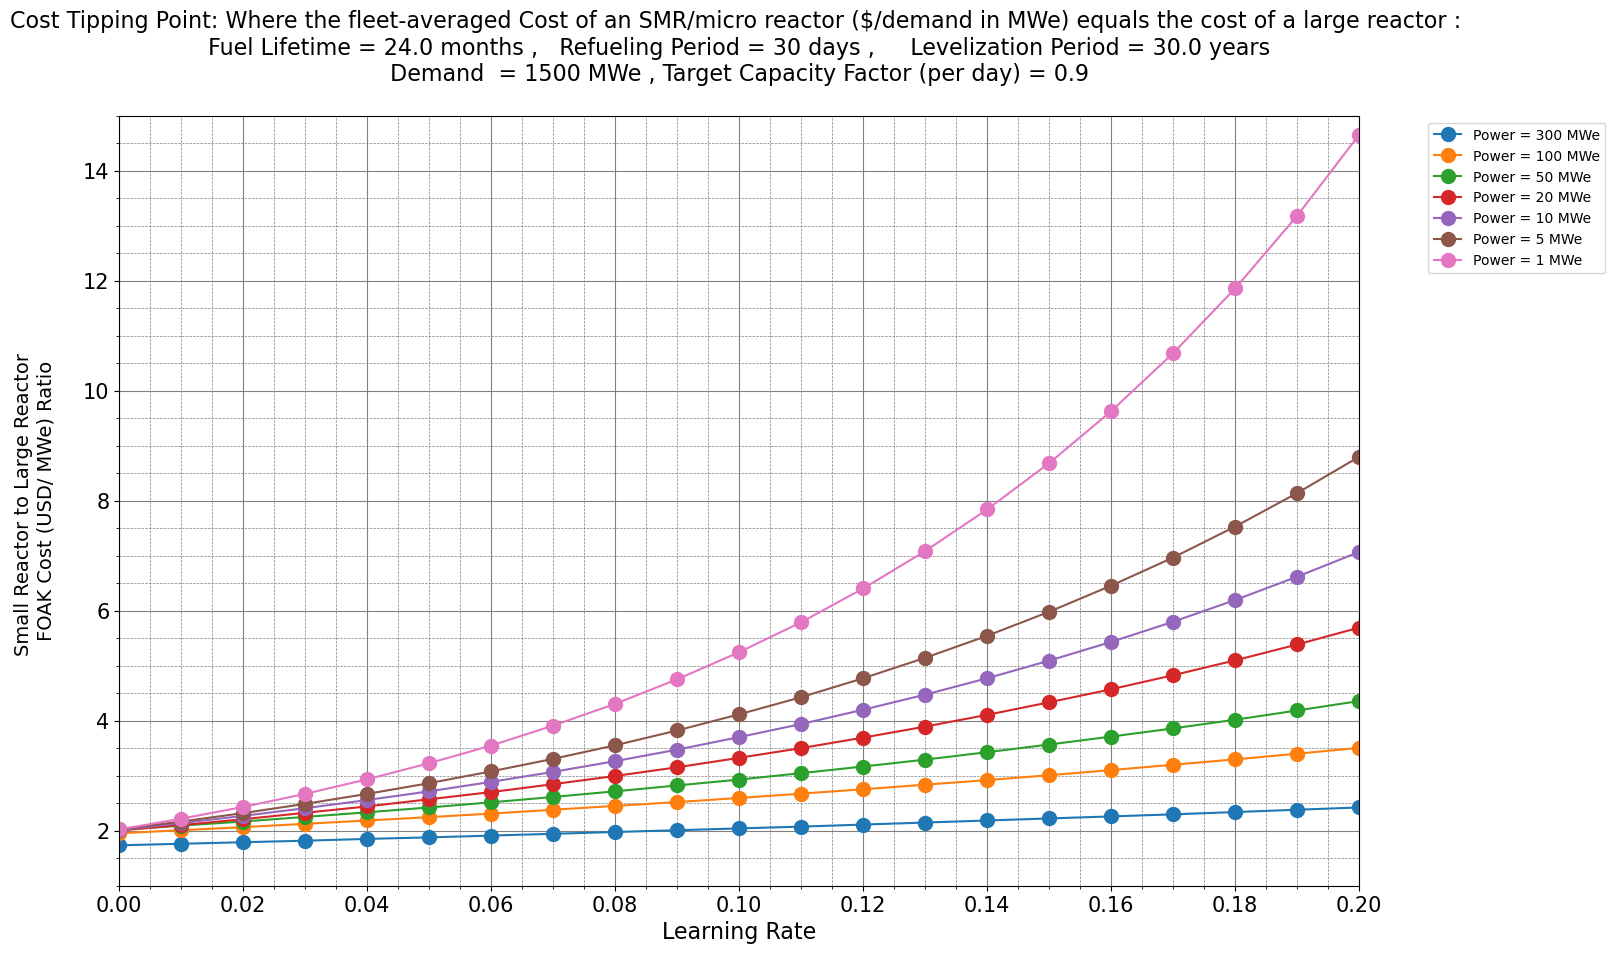

In [36]:
fig = plt.figure(figsize=(16, 10))

for i in range (len(lr_small_save_tot)):
    plt.plot(lr_small_save_tot[i], np.array(tipping_cost_save_tot[i])/cost_large ,'-o' , markersize = 10, label =f'Power = {power_list [i]} MWe')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


plt.grid(which='major', color='grey', linewidth=0.8)
plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
plt.minorticks_on()
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)  

plt.xlabel('Learning Rate',  fontsize=16 )
plt.ylabel('Small Reactor to Large Reactor \n FOAK Cost (USD/ MWe) Ratio \n',  fontsize=14)
plt.xlim(0, 0.2)
plt.ylim(1, 15)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.02))

plt.title(f"Cost Tipping Point: Where the fleet-averaged Cost of an SMR/micro reactor ($/demand in MWe) equals the cost of a large reactor : \n Fuel Lifetime = {np.round(fuel_lifetime_0 /30, 1)} months ,   Refueling Period = {refueling_period_0} days ,\
     Levelization Period = {np.round(levelization_period_0/365, 1)} years \n Demand  = {demand_0} MWe , Target Capacity Factor (per day) = {min_capacity_factor_criteria} \n"  , fontsize=16)
plt.show()


## For a given learning rate how much FOAK penalty can you afford